# **Developing a Binary Assemblage Distance/Dissimilarity Index**

##### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from sklearn.metrics import pairwise_distances
from pathlib import Path

At its most elemental level, pottery assemblages may be compared based on the presence or absences of pottery types to determine whether these are similar or not to each other. Currently, they are many different *binary* metrics that may be used to derive some measurement based on this information. 

In this notebook, we explore the usefulness of some existing *binary* metrics* using a made up example. We  compare these against a newly created dissimilarity coefficient that aligns well with out own intuition on what makes assemblages to be similar or not.

Within our *data* matrix below, 1 represents presence and 0 represents absence 

In [3]:
data = [[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 0, 0],
        [1, 0, 1, 1, 0],
        [1, 0, 0, 1, 1],
        [1, 1, 0, 1, 0],
        [1, 1, 0, 0, 1],
        [1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1 ,0, 1],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 1, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 0, 0, 1],
        [0, 0, 1, 1, 0],
        [0, 0, 1, 0, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 1, 0, 1, 1],
        [0, 1, 1, 0, 1],
        [0, 1, 1, 1, 0],
        [0, 1, 1, 1, 1]]

Assembling data into a table,

In [4]:
degree = [0,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,4, 1,1,1,1,2,2,2,2,2,2,3,3,3,3,4]
relationship = ['target'] + 16*['common']+ 15*['different']
cases = list(range(len(data)))
index= pd.MultiIndex.from_tuples(list(zip(relationship, degree, cases)), names=['relationship', 'degree', 'cases'])
assemblages = pd.DataFrame(data, columns= ['type A', 'type B', 'type C', 'type D', 'type E'], index= index)
assemblages

type A  type B  type C  type D  type E
relationship degree cases                                        
target       0      0           1       0       0       0       0
common       1      1           1       1       0       0       0
                    2           1       0       1       0       0
                    3           1       0       0       1       0
                    4           1       0       0       0       1
             2      5           1       1       1       0       0
                    6           1       0       1       1       0
                    7           1       0       0       1       1
                    8           1       1       0       1       0
                    9           1       1       0       0       1
                    10          1       0       1       0       1
             3      11          1       1       1       1       0
                    12          1       0       1       1       1
                    13          1       1       0       1       1
                    14          1       1       1       0       1
                    15          1       1       1       1       0
             4      16          1       1       1       1       1
different    1      17          0       1       0       0       0
                    18          0       0       1       0       0
                    19          0       0       0       1       0
                    20          0       0       0       0       1
             2      21          0       1       1       0       0
                    22          0       1       0       1       0
                    23          0       1       0       0       1
                    24          0       0       1       1       0
                    25          0       0       1       0       1
                    26          0       0       0       1       1
             3      27          0       0       1       1       1
                    28          0       1       0       1       1
                    29          0       1       1       0       1
                    30          0       1       1       1       0
             4      31          0       1       1       1       1

## Exploring binary metrics

We are interested in finding the dissimilarity or distance between the *target* assemblage (first row) in the above table and the rest of the assemblages in the table (remaining rows). Currently the above table has been enconded in such as way so as to reflect a **qualitative** difference amongst assemblages based on the following two criteria:
   - Whether the rest of the assemblages share the same type with the *target* 
   - How many additional types they share or not with the *target*

So for instance, the first four assemblages (cases 1- 4) all share the same type (*type A*) with  the *target* plus an additional type. So all of these assemblages are very similar to our *target* assemblage. All those assemblages that share the same type/s, in this case only one - *type A*, with the target will be deemed as being more similar, however, the more additional types are present in these assemblages that are not shared with our *target* the less similar they will become. On ther other hand, cases 17-31 are considered to be different from our *target* assemblage because they do not share the same type as this one. The more types they do not share with the *target*, the more dissimilar they are from this assemblage. Case 31, is the most dissimilar case, as it contains all types except for the one present in the target assemblage. 


There are several distance metrics that may be used to calculate the similarity or dissimilarity between assemblages when these are represented in binary form. Here we use a few of the best known ones to calculate the distance between the *target* assemblage and the rest of the assemblages,
    
Hamming

In [5]:
D_hamming = pairwise_distances(assemblages.values == 1, metric= 'hamming')
D_hamming[0]

array([0. , 0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.6, 0.6,
       0.6, 0.6, 0.6, 0.8, 0.4, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.6, 0.6,
       0.6, 0.8, 0.8, 0.8, 0.8, 1. ])

Rogers - Tanimoto

In [6]:
D_rt = pairwise_distances(assemblages.values == 1, metric= 'rogerstanimoto')
D_rt[0]

array([0.        , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.57142857, 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.88888889, 0.57142857, 0.57142857, 0.57142857,
       0.57142857, 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 1.        ])

Sokal - Michener

In [7]:
D_SokalM = pairwise_distances(assemblages.values == 1, metric= 'sokalmichener')
D_SokalM[0]

array([0.        , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.57142857, 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.88888889, 0.57142857, 0.57142857, 0.57142857,
       0.57142857, 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 1.        ])

Dice

In [8]:
D_dice = pairwise_distances(assemblages.values == 1, metric= 'dice')
D_dice[0]

array([0.        , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.6       , 0.66666667, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

Jaccard

In [9]:
D_jaccard = pairwise_distances(assemblages.values == 1, metric= 'jaccard')
D_jaccard[0]

array([0.        , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.8       , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

Kulsinski

In [10]:
D_kulsinski = pairwise_distances(assemblages.values == 1, metric= 'kulsinski')
D_kulsinski[0]

array([0.        , 0.83333333, 0.83333333, 0.83333333, 0.83333333,
       0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
       0.85714286, 0.875     , 0.875     , 0.875     , 0.875     ,
       0.875     , 0.88888889, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

Russell-Rao

In [11]:
D_russellrao = pairwise_distances(assemblages.values == 1, metric= 'russellrao')
D_russellrao[0]

array([0. , 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. ])

YuleQ

In [12]:
D_yule = pairwise_distances(assemblages.values == 1, metric= 'yule')
D_yule[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

Simple Matching Coefficient

In [13]:
def SMC(a,b,c,d):
    return 1 - (a + d) / (a + b + c + d)

In [14]:
from leiap_survey.cluster import create_binary_metric_matrix
create_binary_metric_matrix(assemblages.values, SMC)[0]

array([0. , 0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.6, 0.6,
       0.6, 0.6, 0.6, 0.8, 0.4, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.6, 0.6,
       0.6, 0.8, 0.8, 0.8, 0.8, 1. ])

From the above it can be appreciated that some metrics do better than others at distinguishing between assemblages. However, none of these methods is able to differentiate well some of the degrees within the qualitative differentiations made earlier. For instance, no metric is able to differentiate well cases 17-31 or 11-15 from 17-20.

## New binary assemblage metric

In order to resolve this, and to be able to better discriminate the cases above, it is necessary to generate a new metric. The new metric has the following form,

$$ D = \frac{β \cdot b + β \cdot c}{α \cdot a + β \cdot b + β \cdot c + \frac{d}{α}}$$

In [15]:
def mll(a,b,c,d, α =5, β=1):
    return (β*b + β*c) / (α*a + β*b + β*c + d/α)

In [16]:
from leiap_survey.cluster import create_binary_metric_matrix
create_binary_metric_matrix(assemblages.values, mll)[0]

array([0.  , 0.15, 0.15, 0.15, 0.15, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27,
       0.37, 0.37, 0.37, 0.37, 0.37, 0.44, 0.77, 0.77, 0.77, 0.77, 0.88,
       0.88, 0.88, 0.88, 0.88, 0.88, 0.95, 0.95, 0.95, 0.95, 1.  ])

To explore how the choice of *α* and *β* affects the difference between assemblages, we plot the difference of the target assemblages versus the rest of the assemblages

In [17]:
c1 = [3,5,7,9]
c2 = [1,2,3,5]

α = [ c for c in c1 for i in range(len(c1))]
β = c2* len(c1)
all_coefs = zip(α, β)

α= []
β= []
CASES= []
D=[]

# Loop through coeffients
for c1, c2 in all_coefs:
    rslt = create_binary_metric_matrix(assemblages.values, mll, α= c1, β=c2)  
    α += [c1]*len(rslt[0].tolist())
    β += [c2]*len(rslt[0].tolist())
    CASES += cases
    D += rslt[0].tolist()

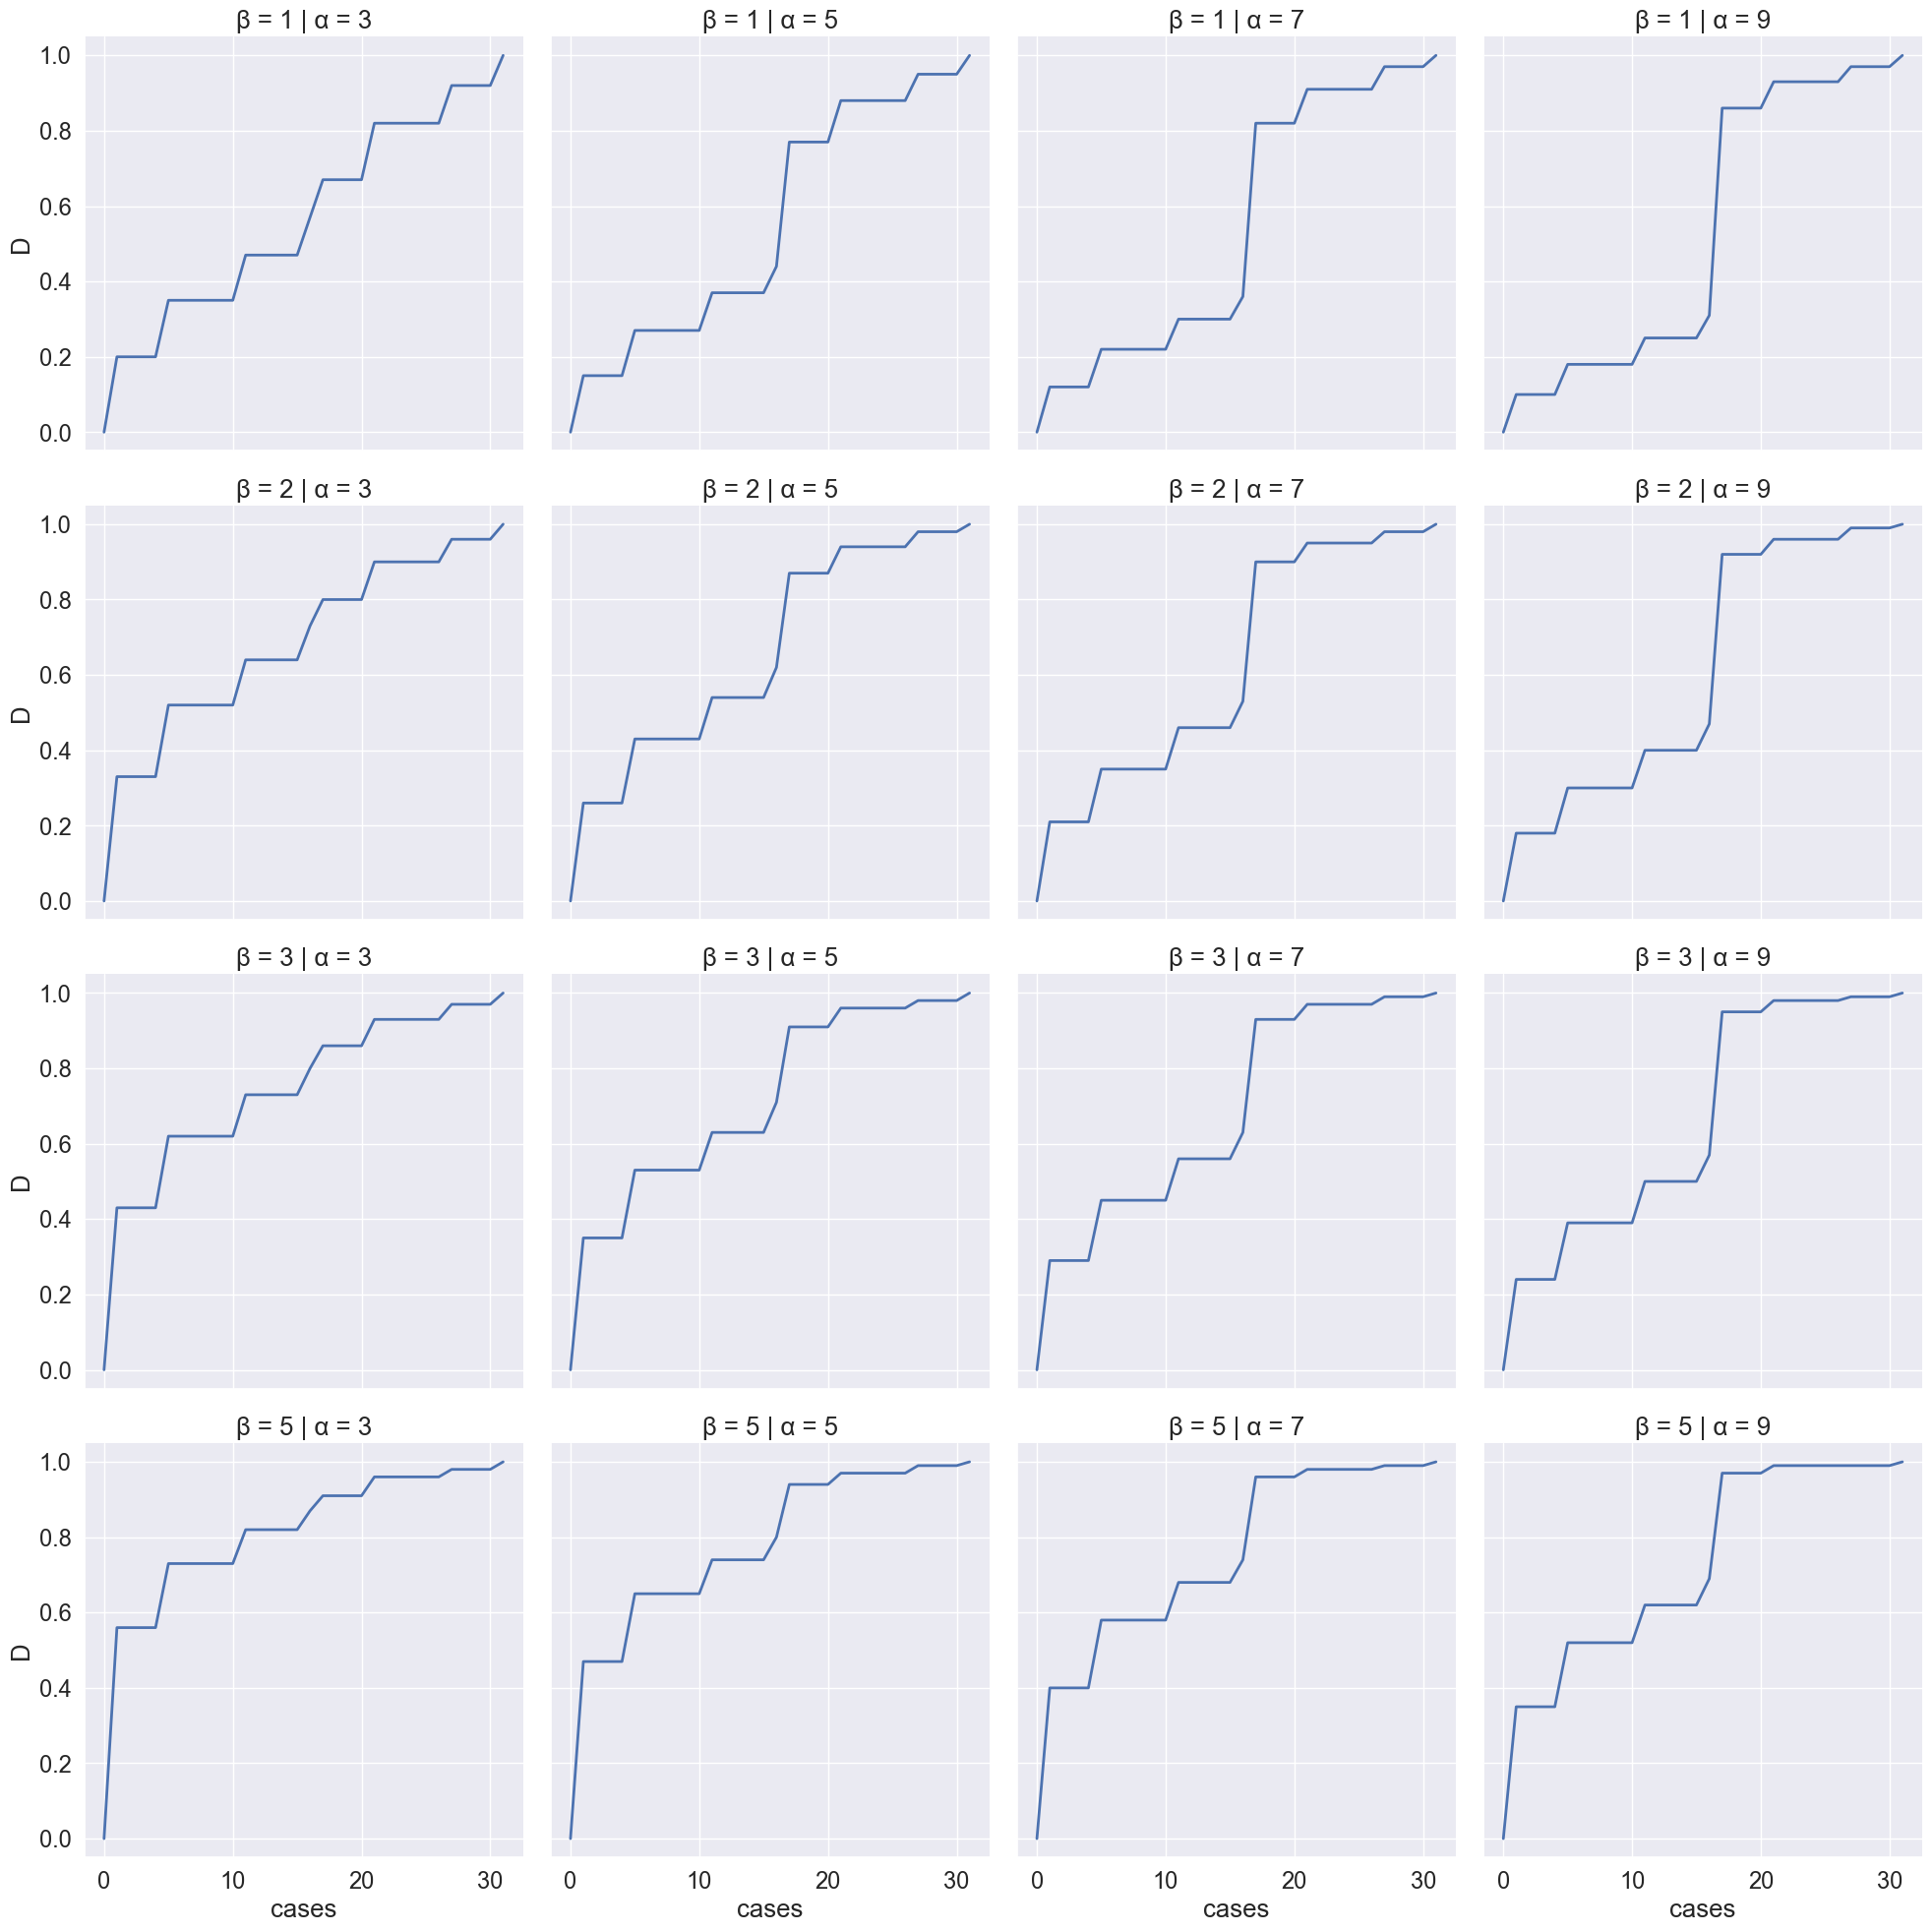

In [32]:
sns.set_style('dark')
sns.set(font_scale = 1.55)

# prepare dataframe for plotting
df = pd.DataFrame({'D': D, 'α':α, 'β':β,'cases': CASES})

# plot
sns.relplot(data= df, x='cases', y= 'D', col='α', row='β', kind='line', linewidth= 2);
plt.savefig(fn, dpi=300)

Based on the above results, we suggest the following,

$$ D_{mll} = \frac{b+c}{5a +b +c + \frac{d}{5}}$$

While the choice was ultimately arbitrary, this set of coefficients (α= 5, β=1 ) allow us to set a clear demarcation between similar from dissimilar assemblages while maintaining a relatively even distribution of coefficient values between the similar and dissimilar assemblages. Larger differentiation can be obtained by subsituting these coefficients as shown in the plot above.

This binary distance metric will be used to differentiate assemblages based on use.

In [22]:
x = np.arange(32)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [23]:
def mll(a,b,c,d, α =5, β=1):
    return (β*b + β*c) / (α*a + β*b + β*c + d/α)

In [24]:
y = create_binary_metric_matrix(assemblages.values, mll)[0]
y

array([0.  , 0.15, 0.15, 0.15, 0.15, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27,
       0.37, 0.37, 0.37, 0.37, 0.37, 0.44, 0.77, 0.77, 0.77, 0.77, 0.88,
       0.88, 0.88, 0.88, 0.88, 0.88, 0.95, 0.95, 0.95, 0.95, 1.  ])

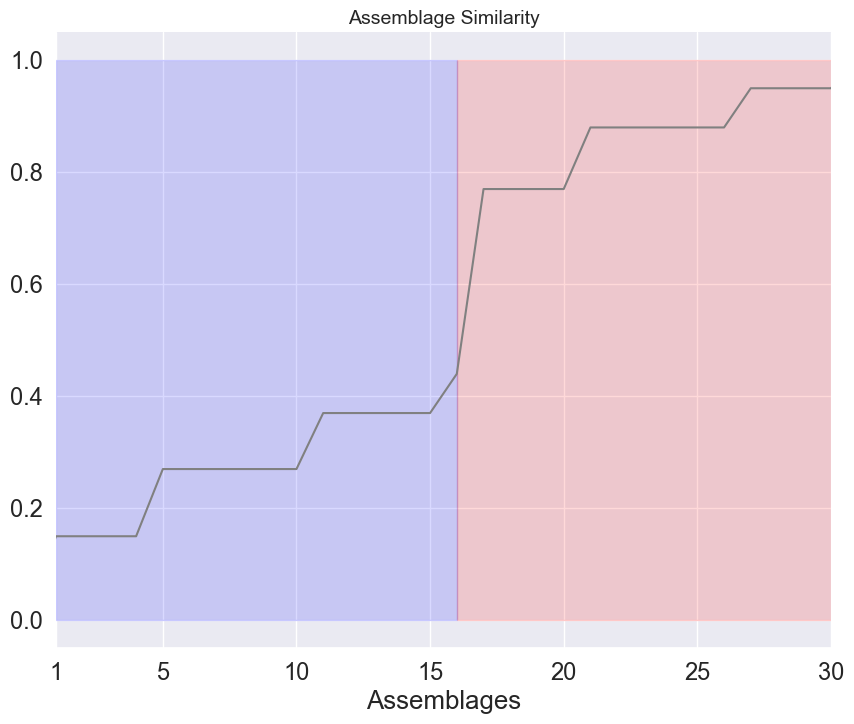

In [30]:
# plot
xy = np.array([[1, 16, 16, 1], [0, 0, 1, 1]]).T
p1 = Polygon(xy, color= 'blue', alpha=0.15)
xy = np.array([[16.01, 31, 31, 16.01], [0, 0, 1, 1]]).T
p2 = Polygon(xy, color= 'red', alpha=0.15)


fig, ax = plt.subplots(figsize= (10,8))
sns.lineplot(x = x, y = y, ax = ax, color='gray')
sns.despine(right= True, top= True, left= True)
ax.add_patch(p1)
ax.add_patch(p2)
ax.set_title('Assemblage Similarity', fontsize= 14)
ax.set_xlim((1,30))
ax.set_xticks([1]+list(range(5,31,5)))
ax.set_xlabel('Assemblages');
plt.savefig(fn, dpi=300)

##### Quick check that metric is symmetrical

In [50]:
M = create_binary_metric_matrix(assemblages.values, mll)
np.allclose(M, M.T, rtol= 1e-05, atol=1e-08)

True